In [2]:
import torch
import torch.nn as nn
from dataloaders import load_cifar10
from trainer import Trainer, compute_loss_and_accuracy
from task2 import create_plots, output_features


In [3]:
class ExampleModel(nn.Module):

    def __init__(self,
                 image_channels,
                 num_classes):
        """
            Is called when model is initialized.
            Args:
                image_channels. Number of color channels in image (3)
                num_classes: Number of classes we want to predict (10)
        """
        super().__init__()
        # TODO: Implement this function (Task  2a)
        #Number of filters in conv layers
        num_filters1 = 32; num_filters2 = 64; num_filters3 = 128
        kernel_conv = 5; stride_conv = 1; padding_conv = 2
        kernel_pool = 2; stride_pool = 2
        
        
        self.num_classes = num_classes
        # Define the convolutional layers
        self.feature_extractor = nn.Sequential(
            nn.Conv2d(in_channels=image_channels, out_channels=num_filters1, kernel_size= kernel_conv,stride=stride_conv,padding=padding_conv),
            nn.BatchNorm2d(num_filters1),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=kernel_pool, stride = stride_pool),
            
            nn.Conv2d(in_channels=num_filters1,  out_channels=num_filters2, kernel_size=kernel_conv,stride=stride_conv,padding=padding_conv),
            nn.BatchNorm2d(num_filters2),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=kernel_pool, stride = stride_pool),
           
            nn.Conv2d(in_channels=num_filters2,   out_channels=num_filters3, kernel_size=kernel_conv,stride=stride_conv,padding=padding_conv),
            nn.BatchNorm2d(num_filters3),
            nn.ReLU(), 
            nn.MaxPool2d(kernel_size=kernel_pool, stride = stride_pool))

        
        # The output of feature_extractor will be [batch_size, num_filters, 16, 16]
        #self.num_output_features = 32*32*32
        self.num_output_features = output_features(num_filters1, num_filters2, num_filters3, kernel_conv, stride_conv, padding_conv,
          kernel_pool, stride_pool)
        linear_filter1 = 64

        # Initialize our last fully connected layer
        # Inputs all extracted features from the convolutional layers
        # Outputs num_classes predictions, 1 for each class.
        # There is no need for softmax activation function, as this is
        # included with nn.CrossEntropyLoss
        self.classifier = nn.Sequential(
            #nn.Linear(self.num_output_features, num_classes),
            nn.Linear(self.num_output_features, self.num_output_features),
            nn.BatchNorm1d(self.num_output_features),
            nn.ReLU(),
            nn.Linear(self.num_output_features, linear_filter1),
            nn.BatchNorm1d(linear_filter1),
            nn.ReLU(),
            nn.Linear(linear_filter1, num_classes))
      

    def forward(self, x):
        """
        Performs a forward pass through the model
        Args:
            x: Input image, shape: [batch_size, 3, 32, 32]
        """
        batch_size = x.shape[0]
        out = self.feature_extractor(x)
        out = out.view(batch_size, -1)
        out = self.classifier(out)        
        expected_shape = (batch_size, self.num_classes)
        assert out.shape == (batch_size, self.num_classes),\
            f"Expected output of forward pass to be: {expected_shape}, but got: {out.shape}"
        return out

In [4]:
epochs = 10
batch_size = 64
learning_rate = 5e-4#5e-2 # Should be 5e-5 for LeNet
early_stop_count = 4
dataloaders = load_cifar10('default', batch_size)
l2_reg_lambda = 0.0
model = ExampleModel(image_channels=3, num_classes=10)
trainer = Trainer(batch_size, learning_rate, early_stop_count, epochs, model, dataloaders, l2_reg_lambda)

trainer.train()


TypeError: load_cifar10() missing 2 required positional arguments: 'transform_name' and 'batch_size'

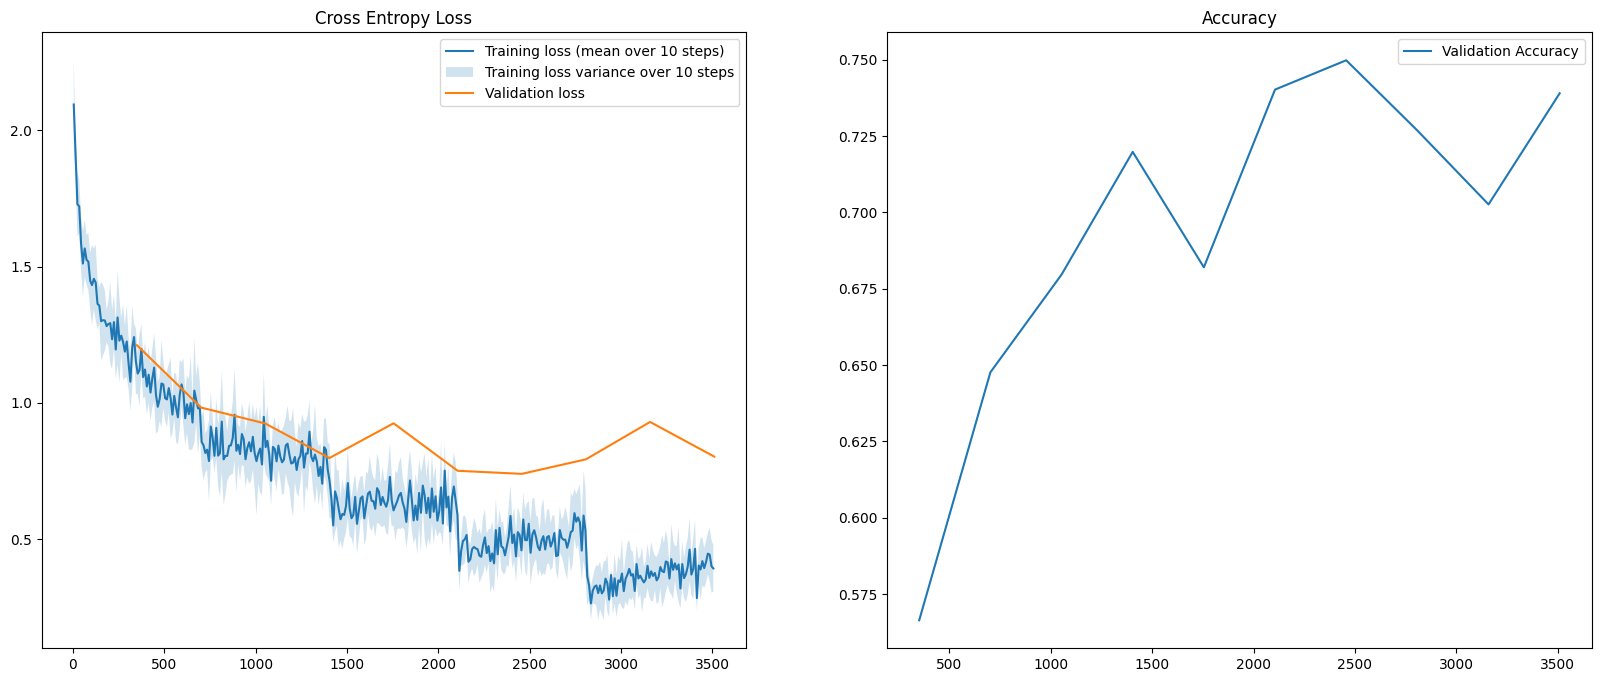

In [5]:
create_plots(trainer, "task2")